<a href="https://colab.research.google.com/github/easobral/dio_yolo_database/blob/main/transfer_learning_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning to detect chickens

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

We download the dataset

In [2]:
! wget -nv "https://drive.google.com/uc?export=download&id=1hfiGpoM_mSKsj8WHRJXgZXx-bbktnAk6" -O dataset.tar.gz
! tar -xf dataset.tar.gz && rm dataset.tar.gz

2025-02-09 23:22:04 URL:https://drive.usercontent.google.com/download?id=1hfiGpoM_mSKsj8WHRJXgZXx-bbktnAk6&export=download [2325923/2325923] -> "dataset.tar.gz" [1]
tar: labels/train/IMG_0570.txt: time stamp 2025-02-10 01:08:18 is 6373.3123271 s in the future
tar: labels/train/IMG_0519.txt: time stamp 2025-02-10 01:08:18 is 6373.312177617 s in the future
tar: labels/train/IMG_0515.txt: time stamp 2025-02-10 01:08:18 is 6373.312105346 s in the future
tar: labels/train/IMG_0547.txt: time stamp 2025-02-10 01:08:18 is 6373.312031925 s in the future
tar: labels/train/IMG_0561.txt: time stamp 2025-02-10 01:08:18 is 6373.311971375 s in the future
tar: labels/train/IMG_0516.txt: time stamp 2025-02-10 01:08:18 is 6373.311903123 s in the future
tar: labels/train/IMG_0545.txt: time stamp 2025-02-10 01:08:18 is 6373.31182929 s in the future
tar: labels/train/IMG_0559.txt: time stamp 2025-02-10 01:08:18 is 6373.311765425 s in the future
tar: labels/train/IMG_0543.txt: time stamp 2025-02-10 01:08:18

we install the lib we will use to run the model.

In [3]:
!pip install ultralytics

Here we fix configure the dataset

In [4]:
!rm data.yaml
!echo "train: images/train" >> data.yaml
!echo "val: images/val" >> data.yaml
!echo "nc: 1  # Number of classes" >> data.yaml
!echo "names: [\"Chicken\"]" >> data.yaml
!ls
!cat data.yaml

datasets  data.yaml  images  labels  runs  sample_data	yolo11n.pt  yolov8s.pt
train: images/train
val: images/val
nc: 1  # Number of classes
names: ["Chicken"]


We fix some issues regarding not finding the images

In [5]:
!mkdir datasets
!mv images datasets
!mv labels datasets
!ls datasets

mkdir: cannot create directory ‘datasets’: File exists
mv: cannot move 'images' to 'datasets/images': Directory not empty
mv: cannot move 'labels' to 'datasets/labels': Directory not empty
images	labels


We load our model and weights

In [6]:
from ultralytics import YOLO

# Load a pre-trained model (YOLOv8s in this case)
model = YOLO("yolov8s.pt")  # You can use "yolov8m.pt", "yolov8l.pt" etc.


We run retrain the model using our data

In [8]:
# Train on custom dataset
model.train(data="data.yaml", epochs=50, batch=16)

New https://pypi.org/project/ultralytics/8.3.74 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

train: Scanning /content/datasets/labels/train.cache... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/labels/val.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train15
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.02G      1.165      2.633      1.535         35        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         18         28      0.494      0.107      0.154      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.98G       1.26      2.575      1.618         36        640: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         18         28      0.518      0.729      0.674      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.19G      1.079      1.798      1.428         34        640: 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         18         28      0.795      0.786      0.871      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.19G      1.028       1.53      1.377         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         18         28       0.72      0.857       0.85      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.03G      1.087      1.574      1.363         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         18         28      0.819      0.645      0.787      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.01G      1.065       1.31      1.328         42        640: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         18         28      0.826      0.643      0.719      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.06G      1.034      1.285      1.335         28        640: 100%|██████████| 3/3 [00:00<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


                   all         18         28      0.687      0.704      0.741      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.22G     0.9467      1.041      1.296         28        640: 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]


                   all         18         28      0.889      0.679      0.826      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.08G     0.8784      0.896      1.157         39        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         18         28      0.575      0.725      0.743      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.13G      1.034      1.051      1.308         26        640: 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         18         28      0.776      0.607      0.698      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.07G     0.9943      1.071      1.263         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         18         28      0.688      0.607      0.711      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.03G      1.004     0.9915      1.334         24        640: 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         18         28      0.758      0.571      0.667      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.07G     0.9017      0.906      1.226         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         18         28      0.587      0.393      0.464       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.02G     0.8956     0.9448      1.223         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         18         28       0.66      0.321       0.41       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.85G     0.9782     0.9332      1.271         23        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         18         28      0.345      0.607      0.376      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.03G      0.955     0.8888      1.216         38        640: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         18         28       0.49      0.515      0.487      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.01G     0.8595     0.7966       1.16         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         18         28      0.579      0.571       0.61      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.01G     0.8847     0.9872      1.262         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         18         28      0.535      0.679      0.581       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.17G     0.8567     0.9361      1.225         30        640: 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         18         28      0.595      0.736      0.648       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.99G     0.9326      1.034      1.198         34        640: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]

                   all         18         28      0.663      0.786      0.703      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.99G       0.91      0.895       1.21         41        640: 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         18         28      0.855      0.679      0.745      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.01G     0.8484     0.8082      1.176         35        640: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         18         28       0.57       0.75      0.669      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.99G     0.8399     0.7496      1.192         32        640: 100%|██████████| 3/3 [00:00<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         18         28      0.715      0.718      0.735      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.17G      0.842     0.8129      1.167         36        640: 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all         18         28      0.758       0.75      0.769      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.01G     0.8495     0.9093      1.223         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         18         28      0.689       0.75      0.792      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.06G     0.9777     0.9143      1.299         28        640: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         18         28      0.698      0.742      0.767      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.18G      0.936     0.8567      1.235         36        640: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         18         28      0.492      0.679      0.642      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.19G     0.7712      0.702      1.168         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         18         28      0.449      0.714      0.667      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.03G     0.8713     0.8341      1.211         28        640: 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         18         28      0.449      0.714      0.667      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.89G     0.8034     0.8216      1.228         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         18         28      0.649      0.679      0.757      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.06G     0.7963     0.6665      1.145         50        640: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         18         28      0.789      0.857      0.819      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.11G     0.8587     0.7218      1.185         34        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         18         28      0.719      0.857       0.77      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.03G     0.8167      0.715      1.169         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all         18         28      0.719      0.857       0.77      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.05G     0.8727     0.7673      1.233         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         18         28      0.789      0.786      0.781      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.05G     0.8306     0.7045       1.18         27        640: 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         18         28      0.835      0.786      0.847      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.03G     0.8381     0.8059      1.258         19        640: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all         18         28       0.85      0.786      0.842      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.01G     0.7876     0.7223       1.15         41        640: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         18         28       0.85      0.786      0.842      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.04G     0.6588     0.6413      1.092         44        640: 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         18         28      0.857      0.857      0.852      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.04G     0.7253     0.7831      1.158         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         18         28      0.762       0.75       0.82       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.01G     0.7789     0.7175       1.13         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

                   all         18         28      0.735      0.786      0.858      0.582


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.01G     0.6326     0.8546      1.034         14        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         18         28      0.735      0.786      0.858      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.87G     0.6279     0.5801      1.031         14        640: 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         18         28       0.75       0.75      0.796      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.88G     0.5809     0.6446     0.9996         11        640: 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         18         28      0.862      0.786      0.832      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.05G     0.5412      0.497      0.961         12        640: 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


                   all         18         28      0.886      0.837      0.894      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         4G      0.533     0.5157     0.9779         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         18         28      0.886      0.837      0.894      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.05G     0.4649     0.4855     0.9388         10        640: 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         18         28      0.864      0.857      0.885      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.88G     0.4908     0.4643      0.943         16        640: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         18         28      0.908      0.857      0.898       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.06G     0.5527     0.5183      1.034         15        640: 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         18         28       0.91      0.857      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.01G     0.5249     0.4446     0.9688         12        640: 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         18         28       0.91      0.857      0.896      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.02G     0.5251     0.4725     0.9903         18        640: 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         18         28      0.887      0.857      0.894      0.681



50 epochs completed in 0.030 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 22.5MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.63it/s]


                   all         18         28      0.795      0.786      0.871      0.684
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train15


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8b497e1b10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
model.val()

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/datasets/labels/val.cache... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


                   all         18         28      0.795      0.786      0.871      0.686
Speed: 0.4ms preprocess, 21.3ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train152


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8b489c17d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

We can see our model had a good accuracy of about 80% considering we used only 57 images, that is good result.


image 1/1 /content/datasets/images/val/IMG_0577.JPG: 480x640 4 Chickens, 13.3ms
Speed: 3.5ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


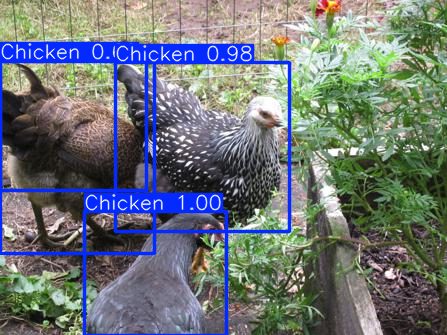

In [11]:
result = model("datasets/images/val/IMG_0577.JPG")
result[0].show()

We can see here that our model correctly identified three chickens, but added one extra. That might be because in many images we can see only the rear of the chicken. We might review our policies when labeling or try to increase the dataset and use fewer images of partial chickens.